In this notebook we train a Logistic Regression (LR) model to distinguish between spam data (food reviews) and legitimate data (Austen). 

Logistic regression is a standard statistical technique used to model a binary variable. In our case the binary variable we are predicting is 'spam' or 'not spam' (i.e. legitimate). 

We begin by loading in the feature vectors which we generated in either notebook [02-feature-engineering](02-feature-engineering.ipynb) or [02a-feature-engineering](02a-feature-engineering.ipynb). 

In [1]:
import pandas as pd

#tf-idf feature vector
#generated in notebook 02-feature-engineering.ipynb
#feats = pd.read_parquet("data/tfidf_features.parquet")

#simple summaries feature vector
#generated in notebook 02a-feature-engineering.ipynb
feats = pd.read_parquet("data/simplesummaries_features.parquet") 

/anaconda2/envs/ml-workflows-for-developers/lib/python3.6/site-packages/pyarrow/pandas_compat.py:708: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels = getattr(columns, 'labels', None) or [
/anaconda2/envs/ml-workflows-for-developers/lib/python3.6/site-packages/pyarrow/pandas_compat.py:735: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return pd.MultiIndex(levels=new_levels, labels=labels, names=columns.names)
/anaconda2/envs/ml-workflows-for-developers/lib/python3.6/site-packages/pyarrow/pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


In [2]:
feats.sample(10)

,index,label,num_punct,num_words,av_wl,max_wl,min_wl,10_quantile,90_quantile,upper_case,stop_words
6055,6055,legitimate,11.0,37.0,4.891892,22.0,2.0,3.0,8.0,6.0,22.0
25567,5567,spam,12.0,77.0,4.532468,9.0,1.0,2.0,7.4,7.0,33.0
34586,14586,spam,12.0,87.0,4.494253,10.0,1.0,2.0,8.0,11.0,36.0
13485,13485,legitimate,7.0,54.0,4.296296,12.0,1.0,2.0,7.0,7.0,32.0
29519,9519,spam,27.0,153.0,4.392157,12.0,1.0,2.0,7.0,17.0,65.0
37391,17391,spam,17.0,118.0,3.940678,11.0,1.0,2.0,6.0,12.0,61.0
8174,8174,legitimate,18.0,106.0,4.301887,11.0,1.0,2.0,7.0,11.0,64.0
5580,5580,legitimate,18.0,116.0,4.189655,12.0,1.0,2.0,7.0,10.0,62.0
30897,10897,spam,5.0,45.0,4.311111,11.0,1.0,2.0,7.0,5.0,23.0
29882,9882,spam,9.0,86.0,3.744186,10.0,1.0,1.5,7.0,12.0,42.0


The first 2 columns of the 'feats' matrix are the index, and label. The remaining columns are the feature vectors. 

We begin by splitting the data into 2 sets: 

* train - a set of feature vectors which will be used to train the model
* test - a set of feature vectors which will be used to evaluate the model we trained

In [3]:
from sklearn import model_selection
train, test = model_selection.train_test_split(feats, random_state=43)

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
model = LogisticRegression(solver = 'lbfgs', max_iter = 4000)

In [6]:
#training the model
import time

start = time.time()
model.fit(X=train.iloc[:,2:train.shape[1]], y=train["label"])
end = time.time()
print(end - start)


0.871845006942749


With the model trained we can use it to make predictions. We apply the model to the 'test' set, then compare the predicted classification of spam or legitimate to the truth.  

In [7]:
predictions = model.predict(test.iloc[:,2:test.shape[1]])

In [8]:
predictions

array(['legitimate', 'spam', 'legitimate', ..., 'spam', 'legitimate',
       'spam'], dtype=object)

We use a binary confusion matrix to visualise the accuracy of the model. 

In [9]:
from mlworkflows import plot

In [10]:
df, chart = plot.binary_confusion_matrix(test["label"], predictions)

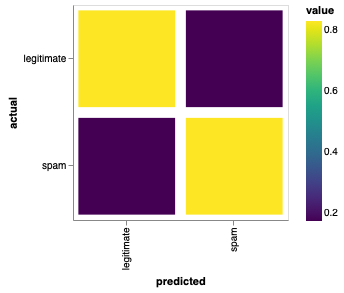

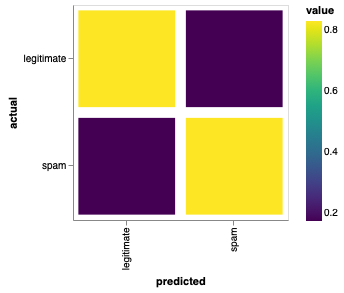

In [11]:
chart

We can look at the raw numbers, and proportions of correctly and incorrectly classified items: 

In [12]:
df

,actual,predicted,raw_count,value
0,legitimate,legitimate,4140,0.827338
1,spam,legitimate,864,0.172662
2,legitimate,spam,854,0.170937
3,spam,spam,4142,0.829063


We can also look at the precision, recall and f1-score for the model. 

In [13]:
from sklearn.metrics import classification_report
print(classification_report(test.label.values, predictions))

              precision    recall  f1-score   support

  legitimate       0.83      0.83      0.83      5004
        spam       0.83      0.83      0.83      4996

   micro avg       0.83      0.83      0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



We want to save the model so that we can use it outside of this notebook. The filename you select should indicate the type of summaries used, i.e. 'simple' or 'tfidf'. 

In [14]:
import pickle
import os

#filename = 'models/lr_model_tfidfsummaries.sav'
filename = 'models/lr_model_simplesummaries.sav'
os.makedirs(os.path.dirname(filename), exist_ok=True)

pickle.dump(model, open(filename, 'wb'))
